Tên công ty: Telco

Lĩnh vực data: Bưu chính và viễn thông

Context: Công ty đang đối mặt với sự giảm đột ngột về tỉ lệ KH churn, hãy tìm hiểu nguyên nhân do đâu KH rời bỏ dịch vụ và đề xuất cải thiện.

Mục tiêu phân tích:
1. Điều gì khiến của dịch vụ đã giữ chân KH và làm cho KH rời bỏ?
2. Trong những nguyên nhân KH rời bỏ thì đâu là nguyên nhân quan trọng nhất?

The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
# data manipulation
import numpy as np
import pandas as pd
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.io as pyio
# data processing
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder,
                                   MinMaxScaler, StandardScaler)
from sklearn.compose import ColumnTransformer

# imblanced dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import EditedNearestNeighbours, RandomUnderSampler
from imblearn.combine import SMOTEENN
# modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.svm import SVC
from scipy.stats import randint, uniform, loguniform
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
# metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [ ]:
df = pd.read_csv('Telco_Churn_Prediction.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Check missing values của cột Total Charges:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
#Tìm giá trị 0 ở cột tenure
df[df['tenure'] == 0].index
# -> K có giá trị 0 ở các cột khác

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [ ]:
#Xóa dữ liệu 0 ở cột tenure
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [ ]:
df[df['TotalCharges'] == 'NaN']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
#Check missing values của object
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
#Check missing value của dtype object:
for name,dtypes in df.dtypes.items():
  print(name,dtypes)
  if dtypes == 'object':
    print(df[name].value_counts())

customerID object
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64
gender object
Male      3549
Female    3483
Name: gender, dtype: int64
SeniorCitizen int64
Partner object
No     3639
Yes    3393
Name: Partner, dtype: int64
Dependents object
No     4933
Yes    2099
Name: Dependents, dtype: int64
tenure int64
PhoneService object
Yes    6352
No      680
Name: PhoneService, dtype: int64
MultipleLines object
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
InternetService object
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
OnlineSecurity object
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
OnlineBackup object
No                     3087
Ye

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


EDA

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
drop_cols = ['customer_id']
target_col = 'Churn'
feature_cols = [col for col in df.columns
                if (col != target_col and
                    not col in drop_cols)]
df = df[sorted(feature_cols) + [target_col]]
print(df[target_col].value_counts())
print(len(feature_cols))

No     5163
Yes    1869
Name: Churn, dtype: int64
20


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df2 = df.copy(deep = True)
text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df2[i] = le.fit_transform(df2[i])
    print(i,' : ',df2[i].unique(),' = ',le.inverse_transform(df2[i].unique()))

Label Encoder Transformation
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
Dependents  :  [0 1]  =  ['No' 'Yes']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
Partner  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
PhoneService  :  [0 1]  =  ['No' 'Yes']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
customerID  :  [5365 3953 2558 ... 3358 5923 2221]  =  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '

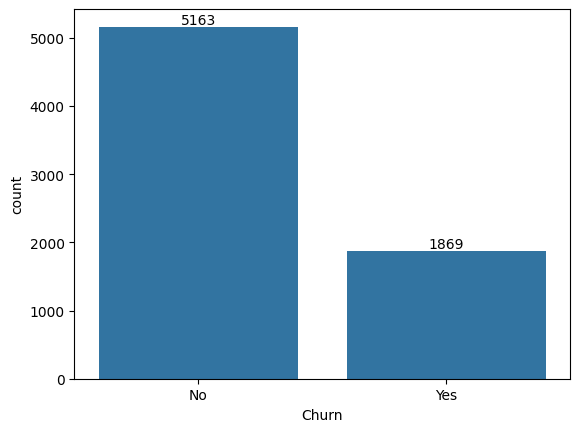

In [ ]:
fig, ax = plt.subplots(1, 1)
count = sns.countplot(df, x=target_col, color ='darkblue')
count.bar_label(count.containers[0]);

sns.countplot(df, x=target_col)
plt.show()

In [ ]:
ex.pie(df,names='Churn',title='Proportion of churn vs not churn customers',hole=0.33)

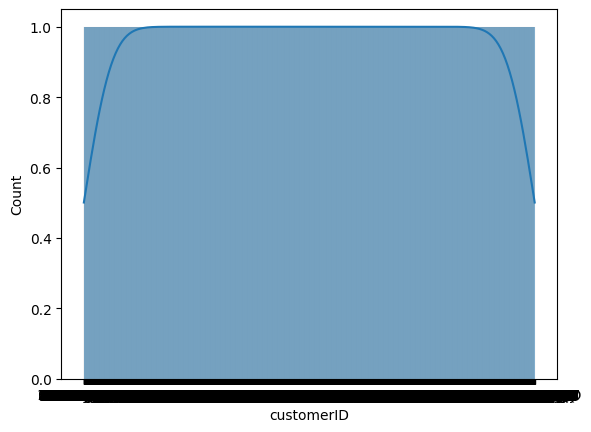

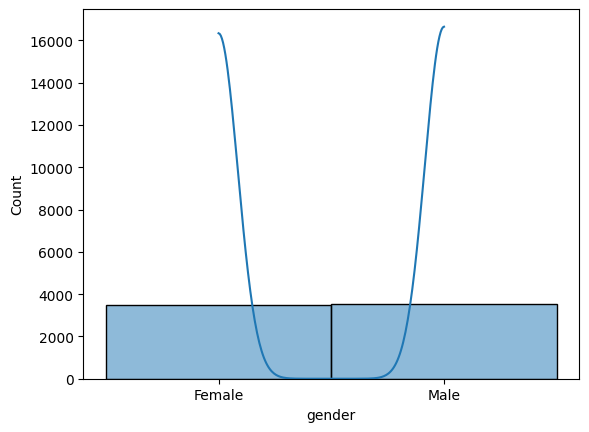

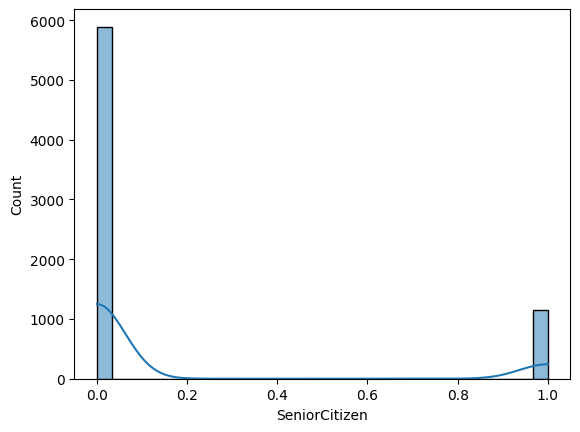

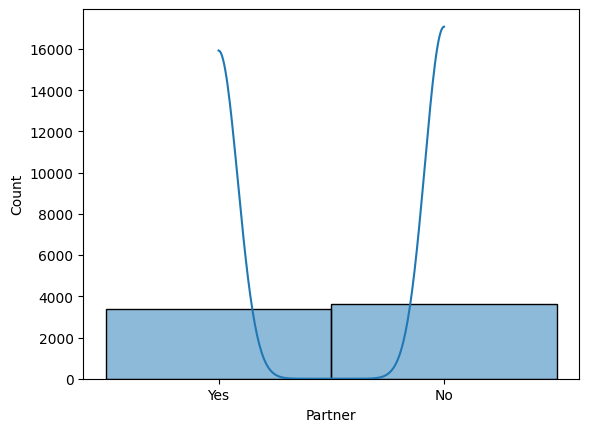

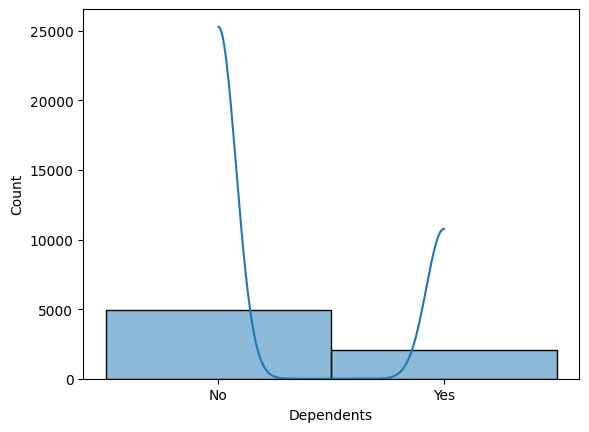

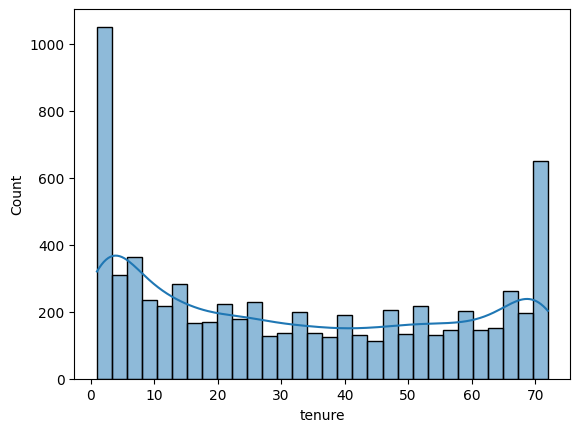

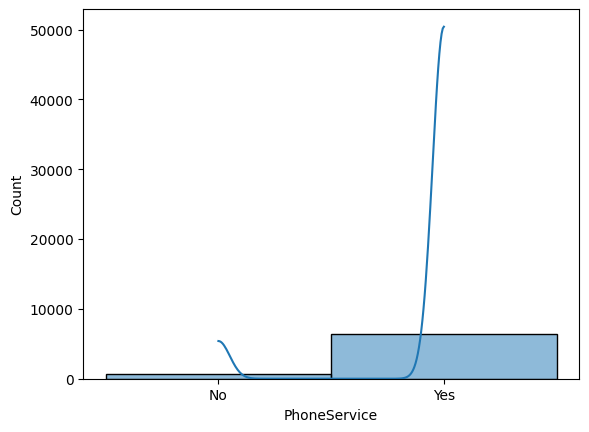

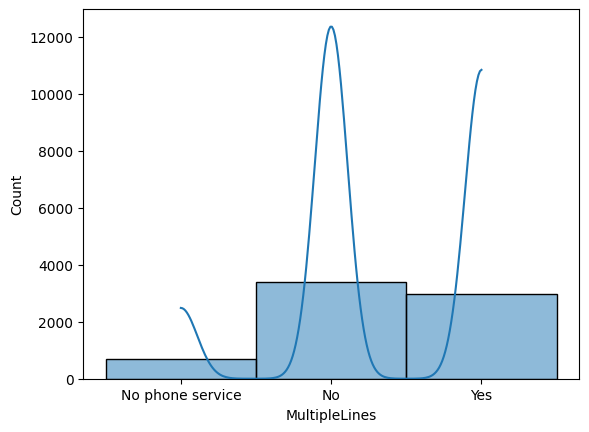

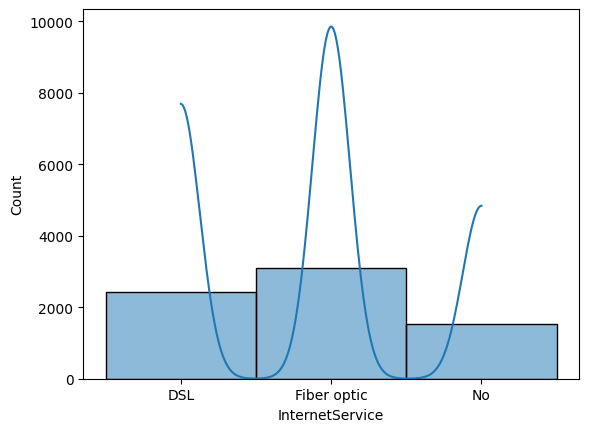

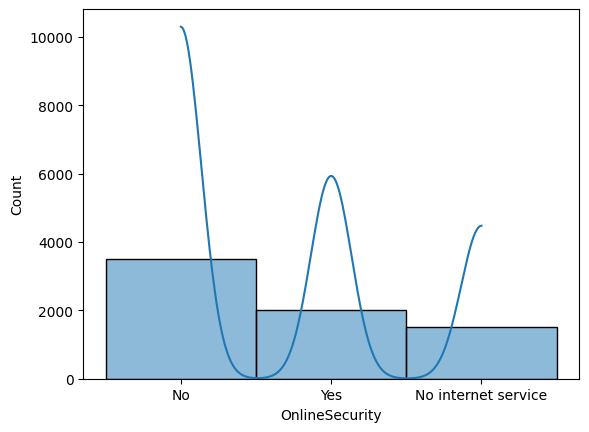

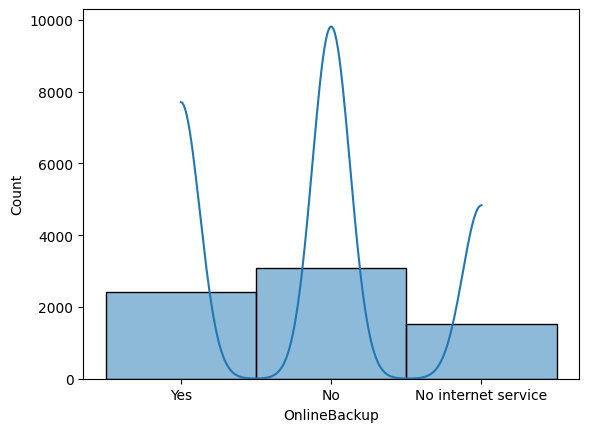

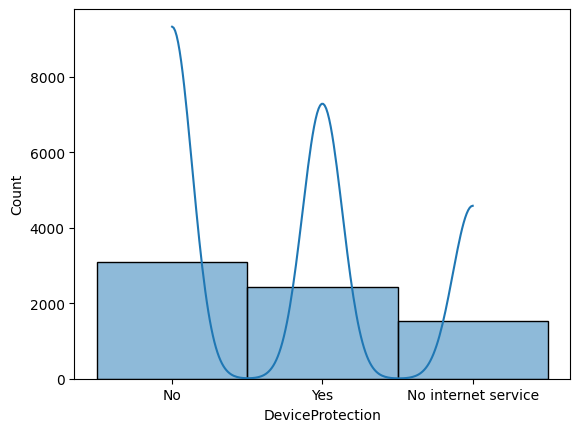

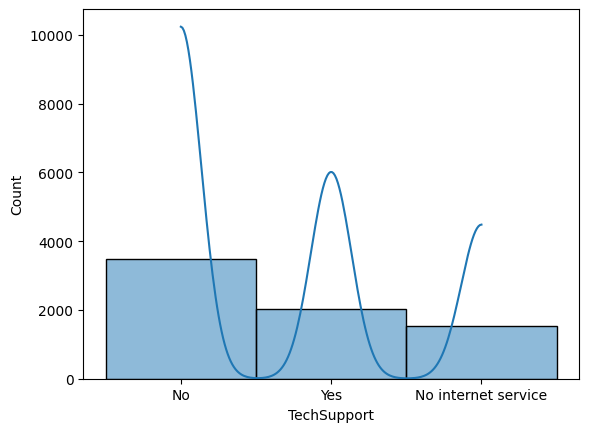

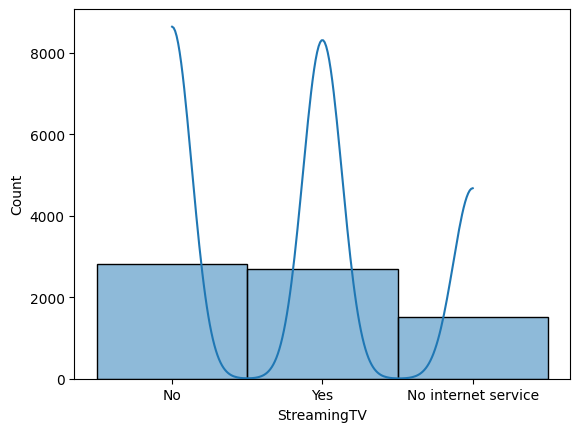

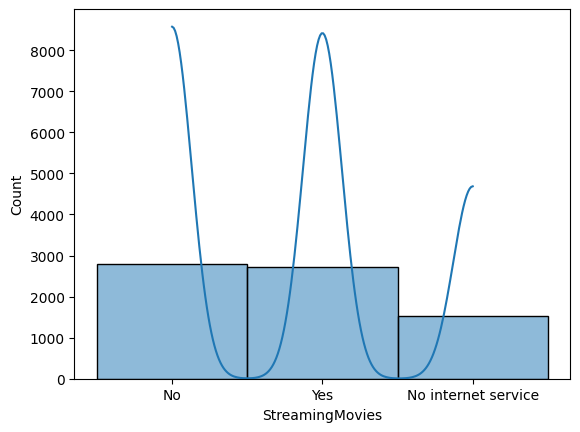

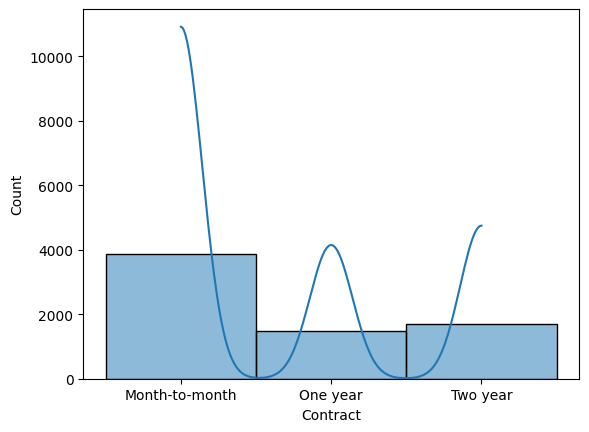

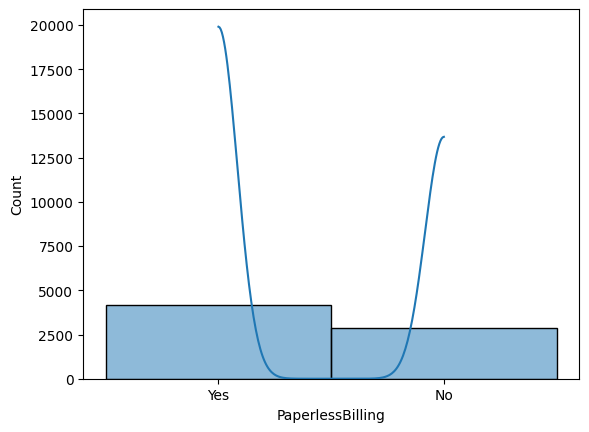

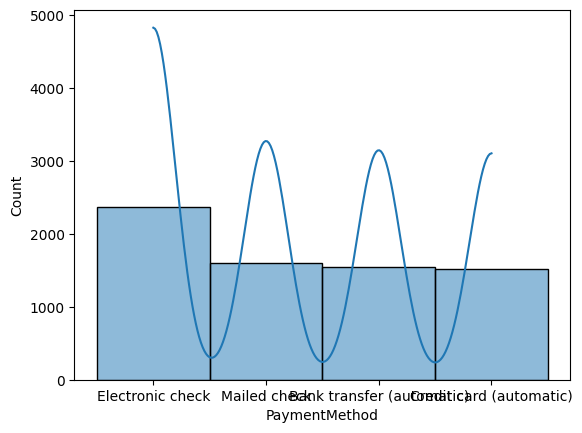

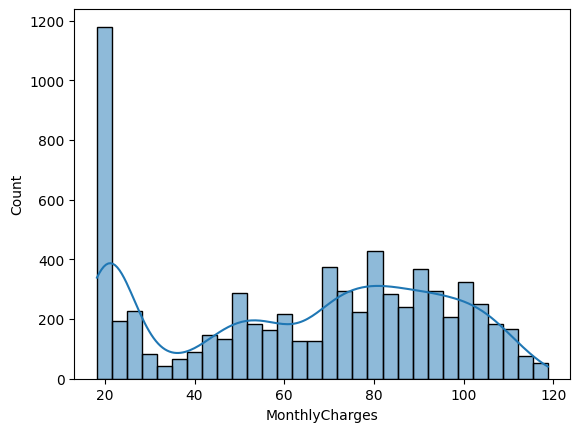

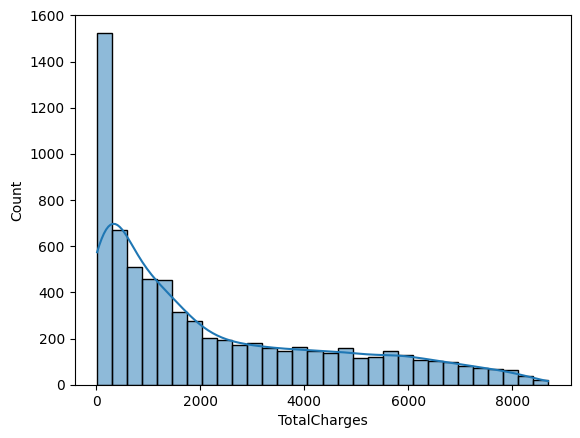

In [ ]:
#Features Distribution
for feature_col in feature_cols:
    sns.histplot(df, x=feature_col, kde=True, bins=30)
    if feature_col.find('date') >= 0:
        plt.xticks(rotation=45)
    plt.show()

ANALYZE

In [ ]:
#Gender & Churn
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [ ]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

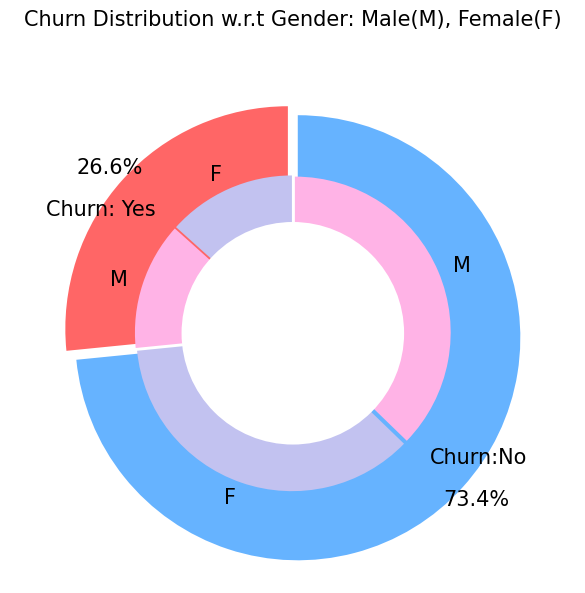

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
# SeniorCitizen & Churn
fig = ex.histogram(df, x="Churn", color="SeniorCitizen", barmode="group", title="<b>SeniorCitizen distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
# Partner & Churn
fig = ex.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Partner distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
# Dependents & Churn
fig = ex.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
#PhoneService & Churn
fig = ex.histogram(df, x="Churn", color="PhoneService", barmode="group", title="<b>Customer PhoneService distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
#MultipleLines & Churn
fig = ex.histogram(df, x="Churn", color="MultipleLines", barmode="group", title="<b>Customer MultipleLines distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
#Internet & Churn
fig = ex.histogram(df, x="Churn", color="InternetService", barmode="group", title="<b>Internet Service distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
#OnlineSecurity & Churn
fig = ex.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Online Security distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
#OnlineBackup & Churn
fig = ex.histogram(df, x="Churn", color="OnlineBackup", barmode="group", title="<b>Online Backup distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
#DeviceProtection & Churn
fig = ex.histogram(df, x="Churn", color="DeviceProtection", barmode="group", title="<b>Device Protection distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
#TechSupport & Churn
fig = ex.histogram(df, x="Churn", color="TechSupport", barmode="group", title="<b>Tech Support distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
#StreamingTV & Churn
fig = ex.histogram(df, x="Churn", color="StreamingTV", barmode="group", title="<b>Streaming TV distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
#Streaming Movies & Churn
fig = ex.histogram(df, x="Churn", color="StreamingMovies", barmode="group", title="<b>Streaming Movies distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
#Contract & Churn
fig = ex.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
#PaperlessBilling & Churn
fig = ex.histogram(df, x="Churn", color="PaperlessBilling", barmode="group", title="<b>PaperlessBilling distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
#PaymentMethod & Churn
fig = ex.histogram(df, x="Churn", color="PaymentMethod", barmode="group", title="<b>Payment Method distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

<ipython-input-38-43ea484bd61b>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-38-43ea484bd61b>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




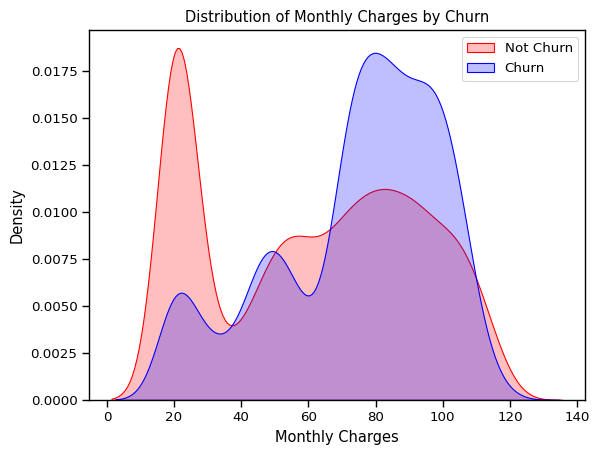

In [ ]:
#MonthlyCharges & Churn
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of Monthly Charges by Churn');

<ipython-input-39-06472feaa53c>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-39-06472feaa53c>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




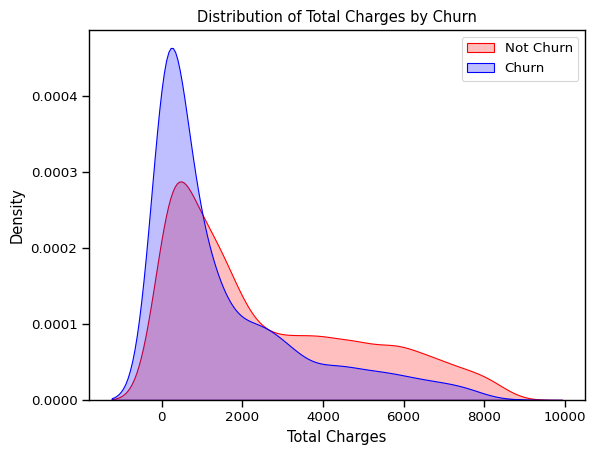

In [ ]:
#TotalCharges & Churn
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of Total Charges by Churn');

In [ ]:
#Tenure & Churn
fig = ex.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7032 non-null   object 
 1   Dependents        7032 non-null   object 
 2   DeviceProtection  7032 non-null   object 
 3   InternetService   7032 non-null   object 
 4   MonthlyCharges    7032 non-null   float64
 5   MultipleLines     7032 non-null   object 
 6   OnlineBackup      7032 non-null   object 
 7   OnlineSecurity    7032 non-null   object 
 8   PaperlessBilling  7032 non-null   object 
 9   Partner           7032 non-null   object 
 10  PaymentMethod     7032 non-null   object 
 11  PhoneService      7032 non-null   object 
 12  SeniorCitizen     7032 non-null   int64  
 13  StreamingMovies   7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  TechSupport       7032 non-null   object 
 16  TotalCharges      7032 non-null   float64


In [ ]:
l1 = ['SeniorCitizen','Partner','Dependents'] #Customer

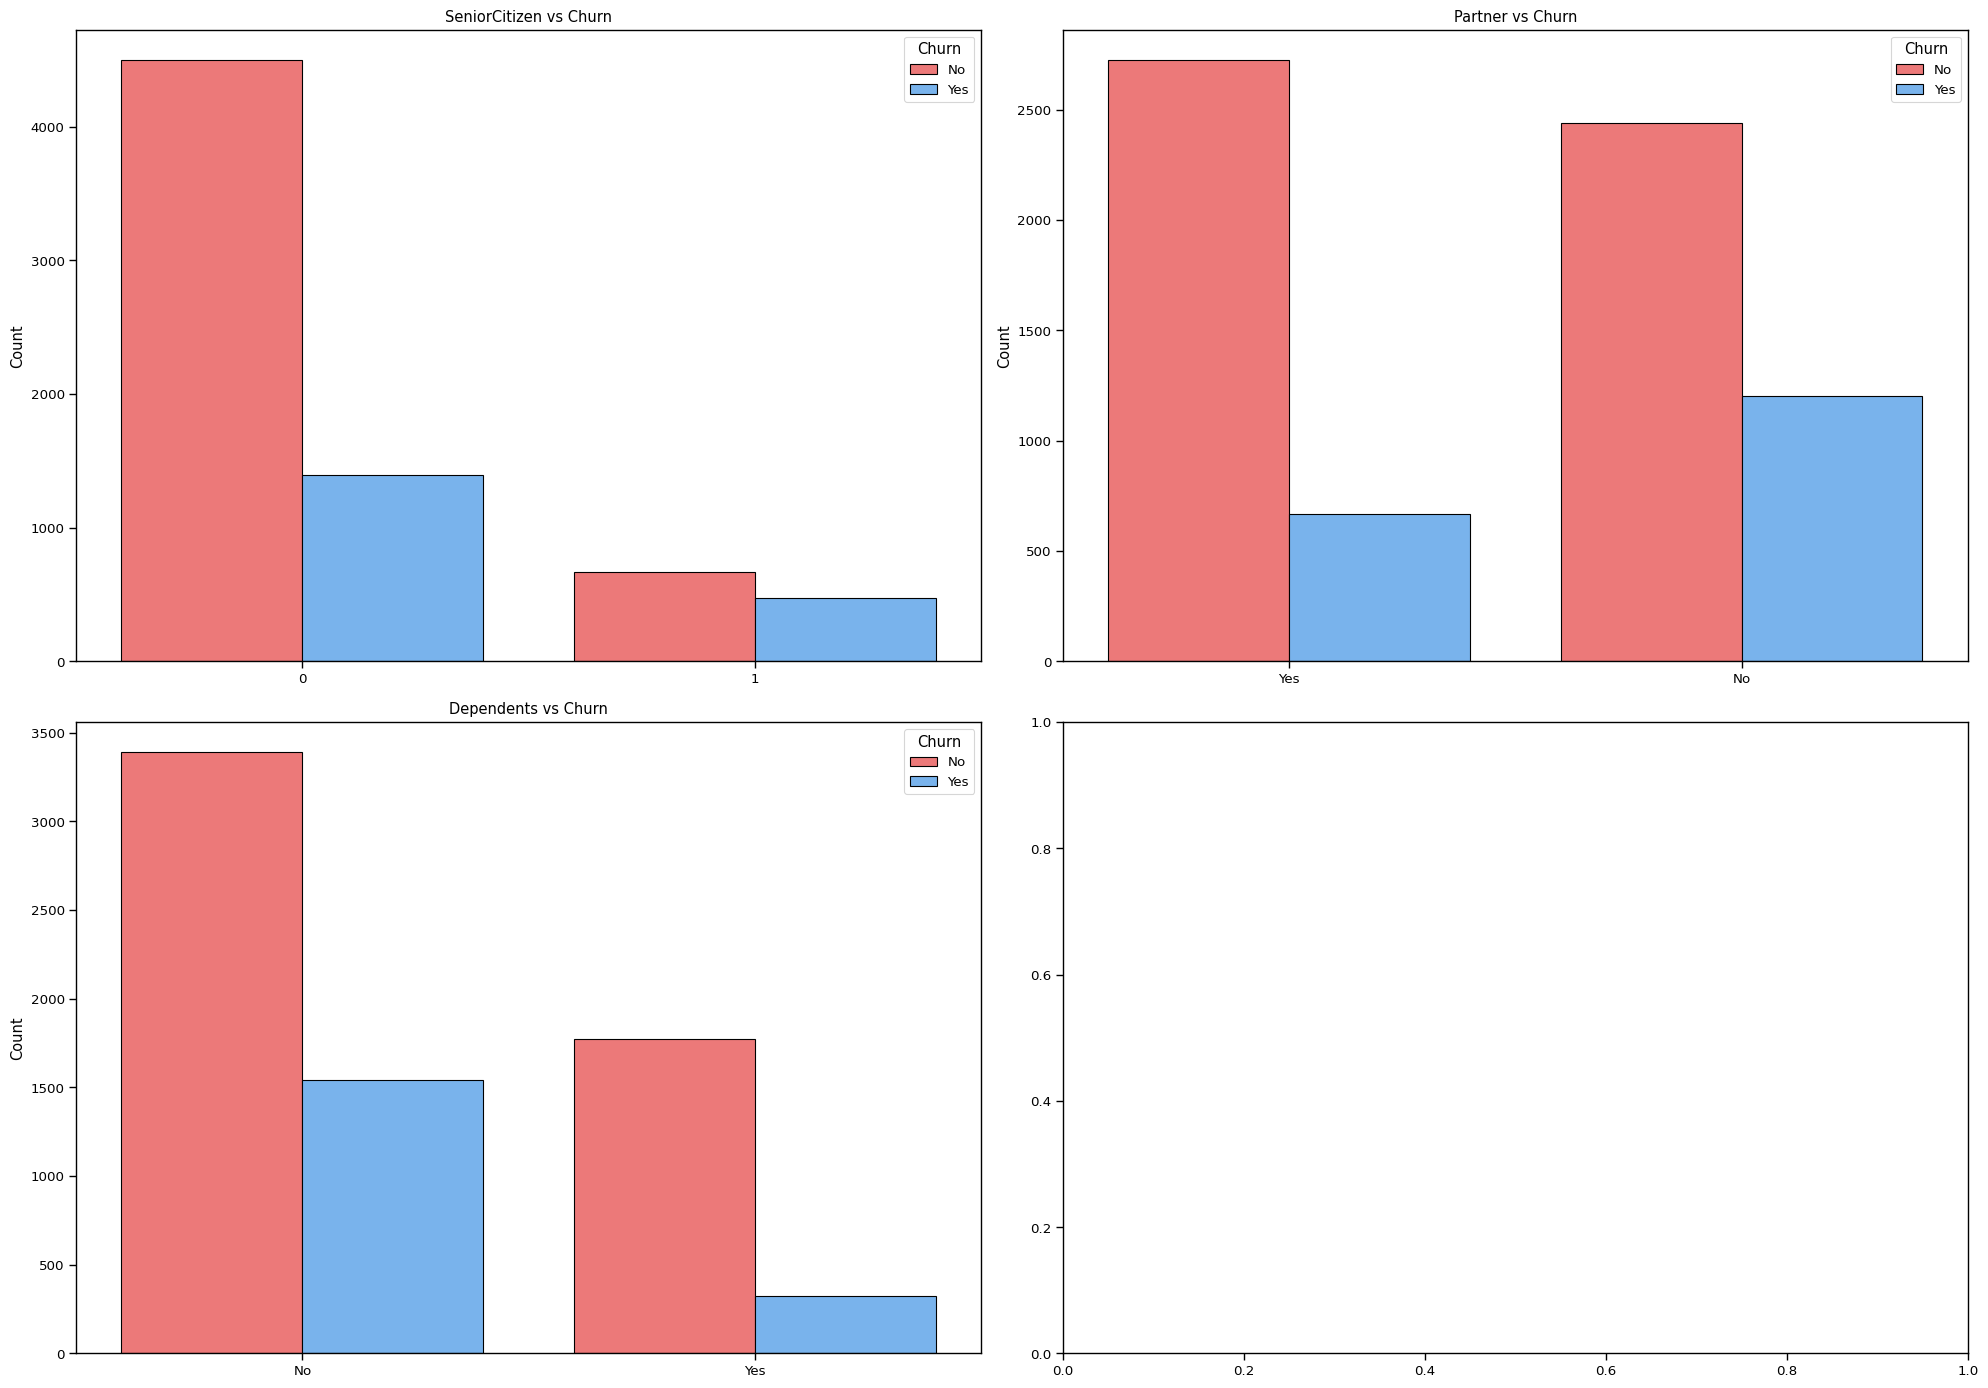

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

for i in range(len(l1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=l1[i], data=df, hue="Churn", palette=colors, edgecolor='black')
    plt.title(l1[i] + ' vs Churn')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
seniorcitizen = df2[df2['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

partner = df2[df2['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes

dependents = df2[df2['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes


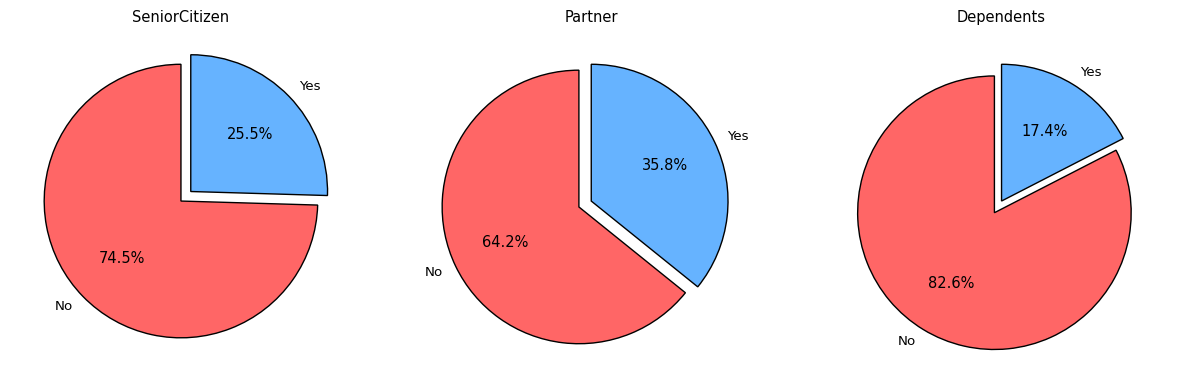

In [ ]:
ax, fig = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.pie(seniorcitizen, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('SeniorCitizen')

plt.subplot(1, 3, 2)
plt.pie(partner, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Partner')

plt.subplot(1, 3, 3)
plt.pie(dependents, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Dependents')

plt.show()

# 75% of the churned customers are not SeniorCitizen! This is a major info that the company needs to divert it's attention towards!
# Customers living by themselves have cutoff the services. From Partners & Dependents data, average of 73.4% of customers churned out were living by themselves.


<ipython-input-46-8645be06aea1>:3: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

<ipython-input-46-8645be06aea1>:3: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



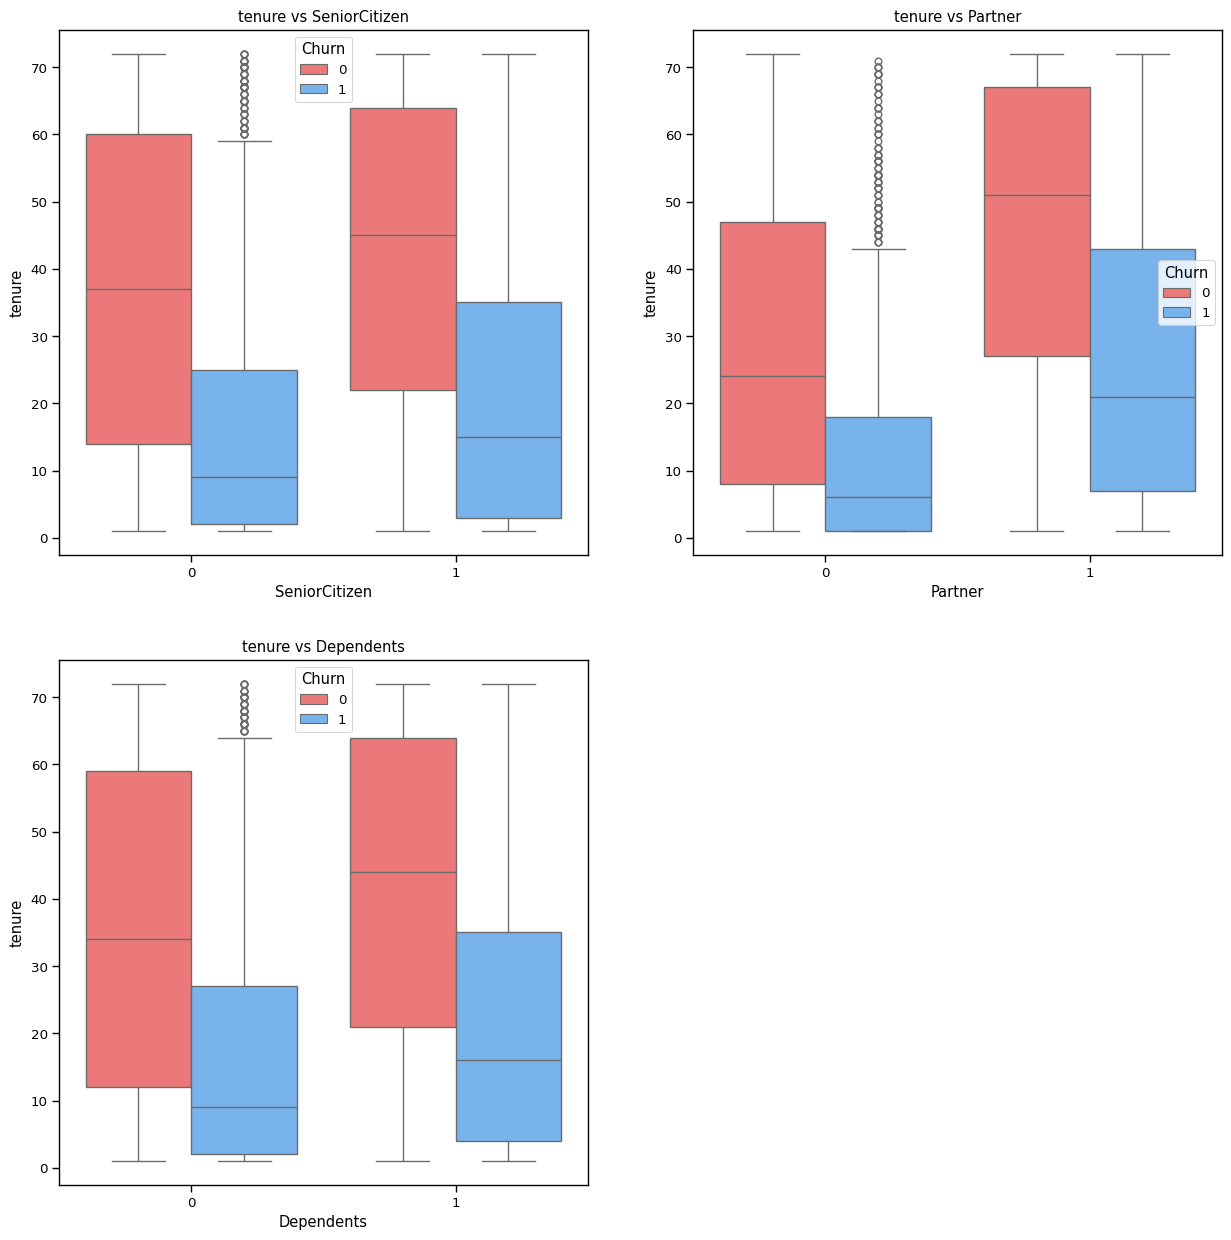

In [ ]:
fig = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
for i in range(3):
    plt.subplot(2, 2, i + 1)
    ax = sns.boxplot(x=l1[i], y='tenure', data=df2, hue='Churn', palette=colors)
    plt.title('tenure vs ' + l1[i])
# SeniorCitizen opted out from the services for a tenure values of 0 - 35 months. 20 - 35 months is the kind of decision making period about whether to continue or swtich for SeniorCitizen.
# Similarly, customers with partners continued with the service for a tenure of 5 - 45 months.

<ipython-input-47-b832ee93907c>:3: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

<ipython-input-47-b832ee93907c>:3: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



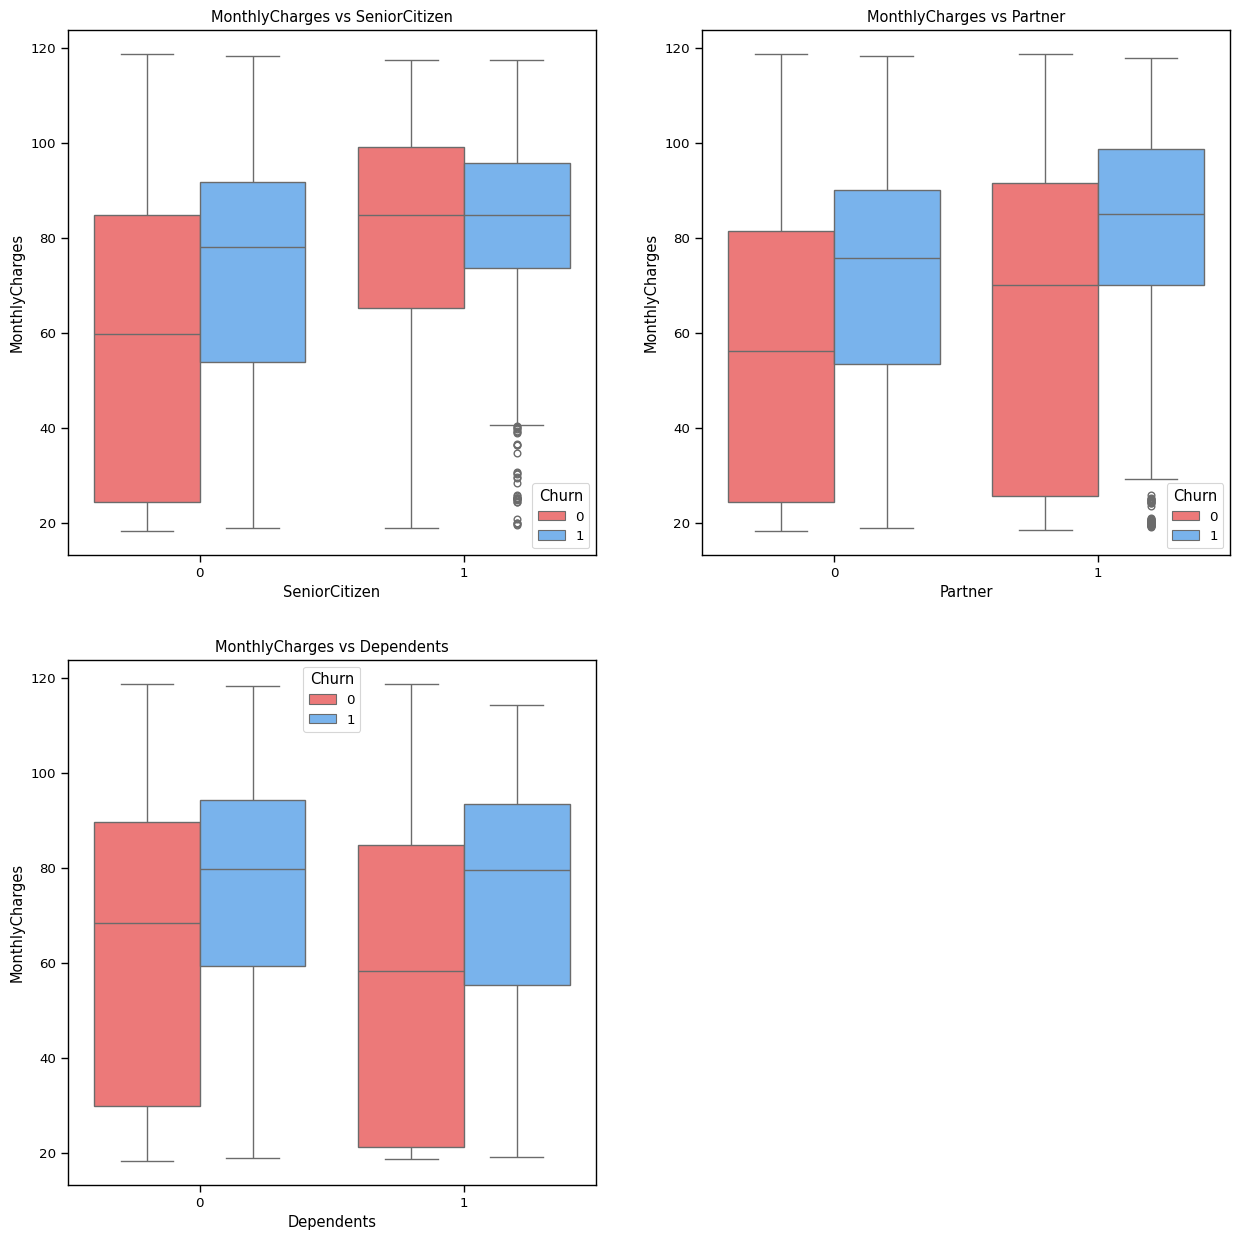

In [ ]:
fig = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
for i in range(3):
    plt.subplot(2, 2, i + 1)
    ax = sns.boxplot(x=l1[i], y='MonthlyCharges', data=df2, hue='Churn', palette=colors)
    plt.title('MonthlyCharges vs ' + l1[i])
# MonthlyCharges of around 60. For SeniorCitizen, this value is pushed to 80.
# Customers living with Partner have a higher lower limit of churning, MonthlyCharges of 70, than those living alone, MonthlyCharges of just below 60!

<ipython-input-48-1431e7f91ccd>:3: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

<ipython-input-48-1431e7f91ccd>:3: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



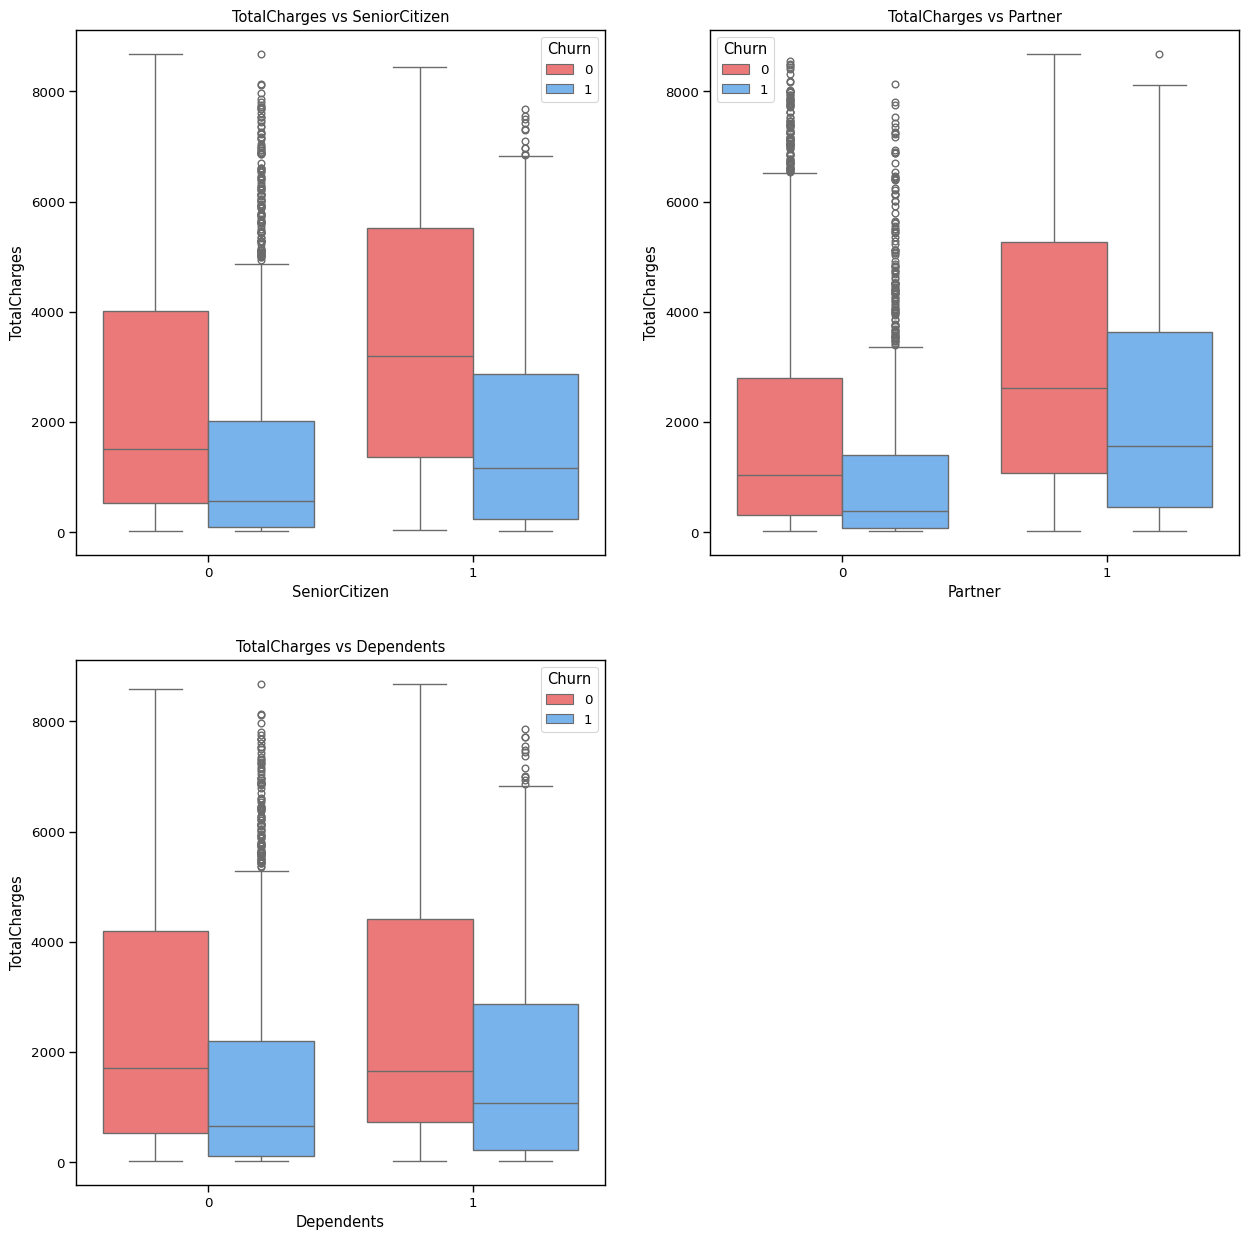

In [ ]:
fig = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
for i in range(3):
    plt.subplot(2, 2, i + 1)
    ax = sns.boxplot(x=l1[i], y='TotalCharges', data=df2, hue='Churn', palette=colors)
    plt.title('TotalCharges vs ' + l1[i])
# SeniorCitizen that continued with the services have a higher starting and closing values of TotalCharges.
# Customers housing with their Partner have a higher median value of TotalCharges as compared to those living alone!

In [ ]:
l2 = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']

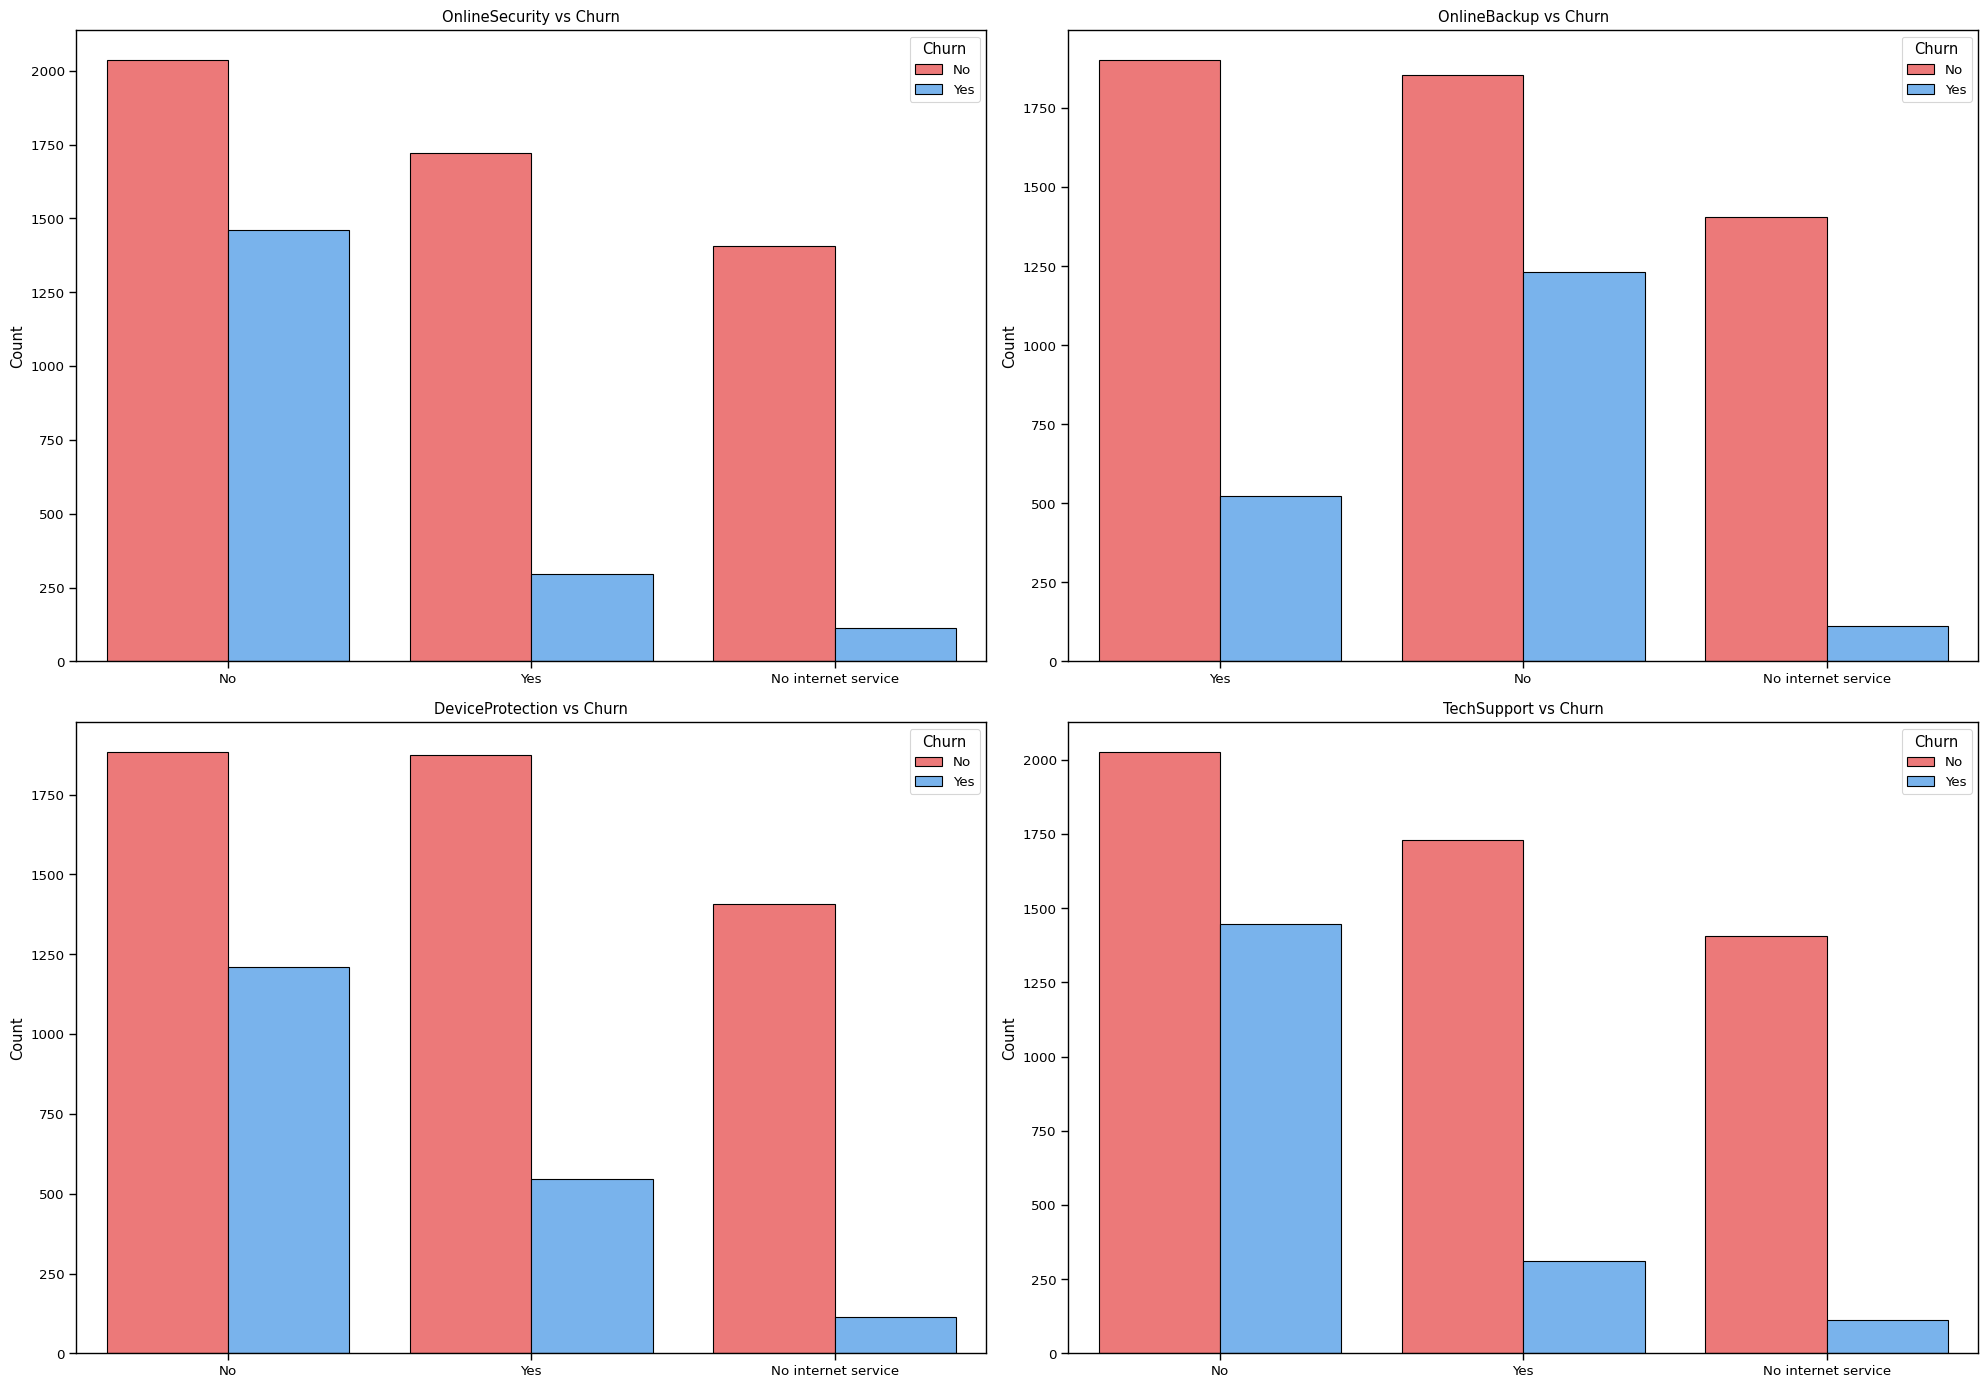

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

for i in range(len(l2)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=l2[i], data=df, hue="Churn", palette=colors, edgecolor='black')
    plt.title(l2[i] + ' vs Churn')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
onlinesecurity = df2[df2['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100]

onlinebackup = df2[df2['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100]

deviceprotection = df2[df2['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100]

techsupport = df2[df2['Churn'] == 1]['TechSupport'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] #

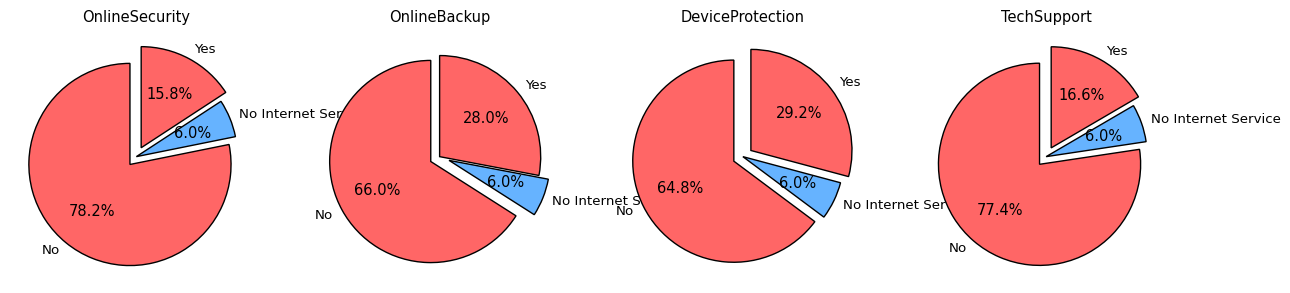

In [ ]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(onlinesecurity,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity');

plt.subplot(1,4,2)
plt.pie(onlinebackup,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup');

plt.subplot(1,4,3)
plt.pie(deviceprotection,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection');

plt.subplot(1,4,4)
plt.pie(techsupport,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport');
#Based on the chart above, we see that when these 4 services are not used, there will be over 65% churn rate.

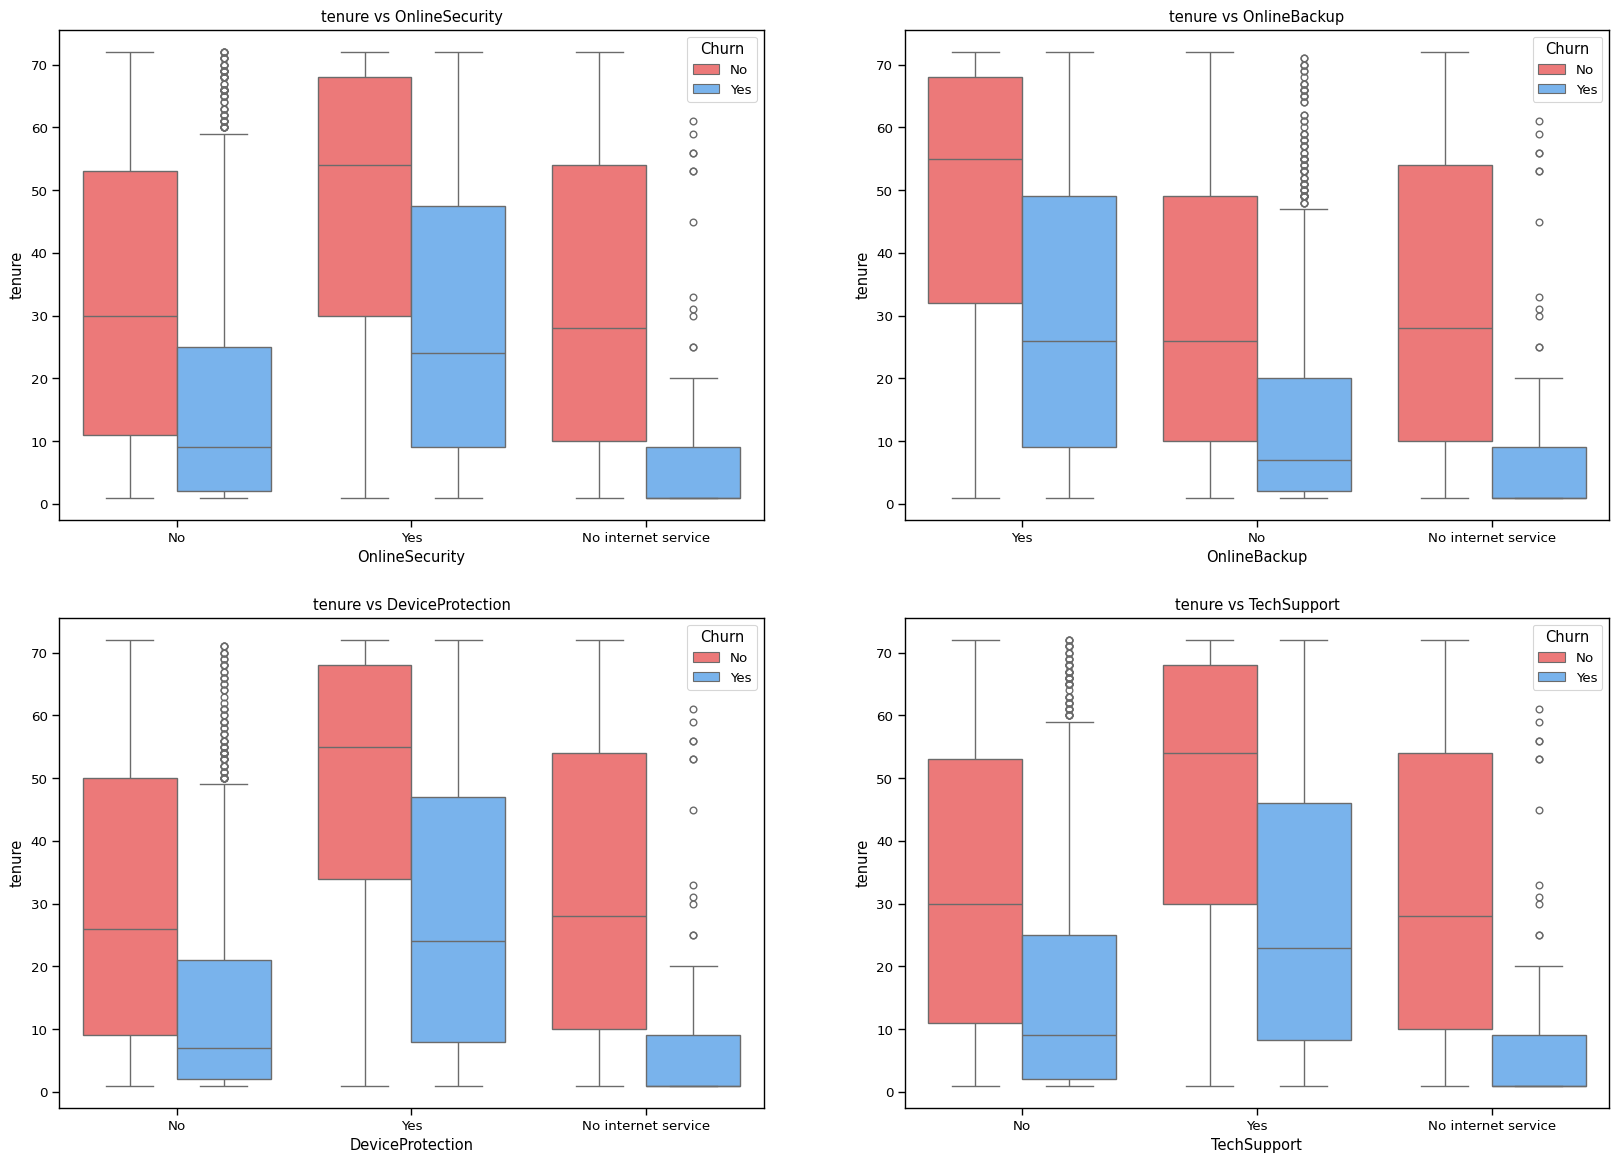

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'tenure',data = df,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l2[i-4]);
# khi khách hàng không sử dụng dịch vụ  kỳ hạn mà khách rời bỏ dịch vụ tầm 20 tháng
# khi khách hàng sử dụng dịch vụ thì thì kỳ hạn mà khách rời bỏ dịch vụ là từ 10-50 tháng

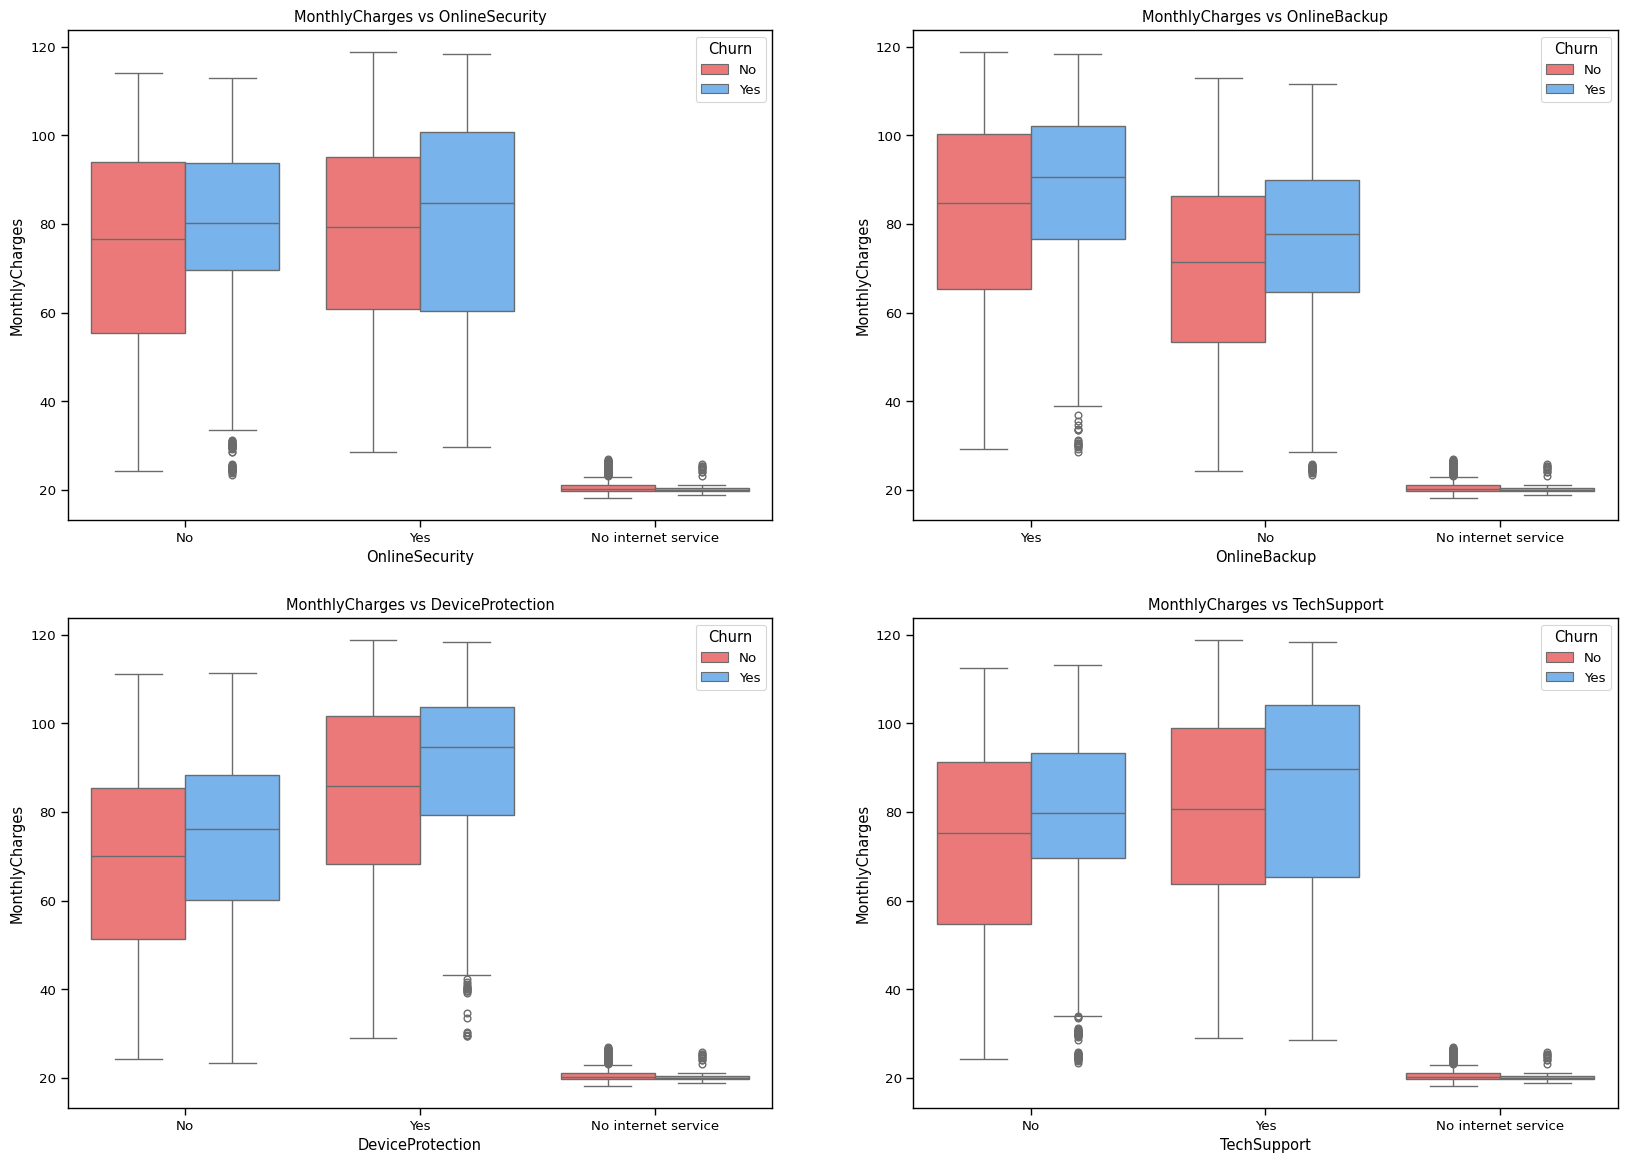

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'MonthlyCharges',data = df,hue = 'Churn',palette = colors);
    plt.title('MonthlyCharges vs ' + l2[i-4]);
#For OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport, range of values is from around 50 to 100.

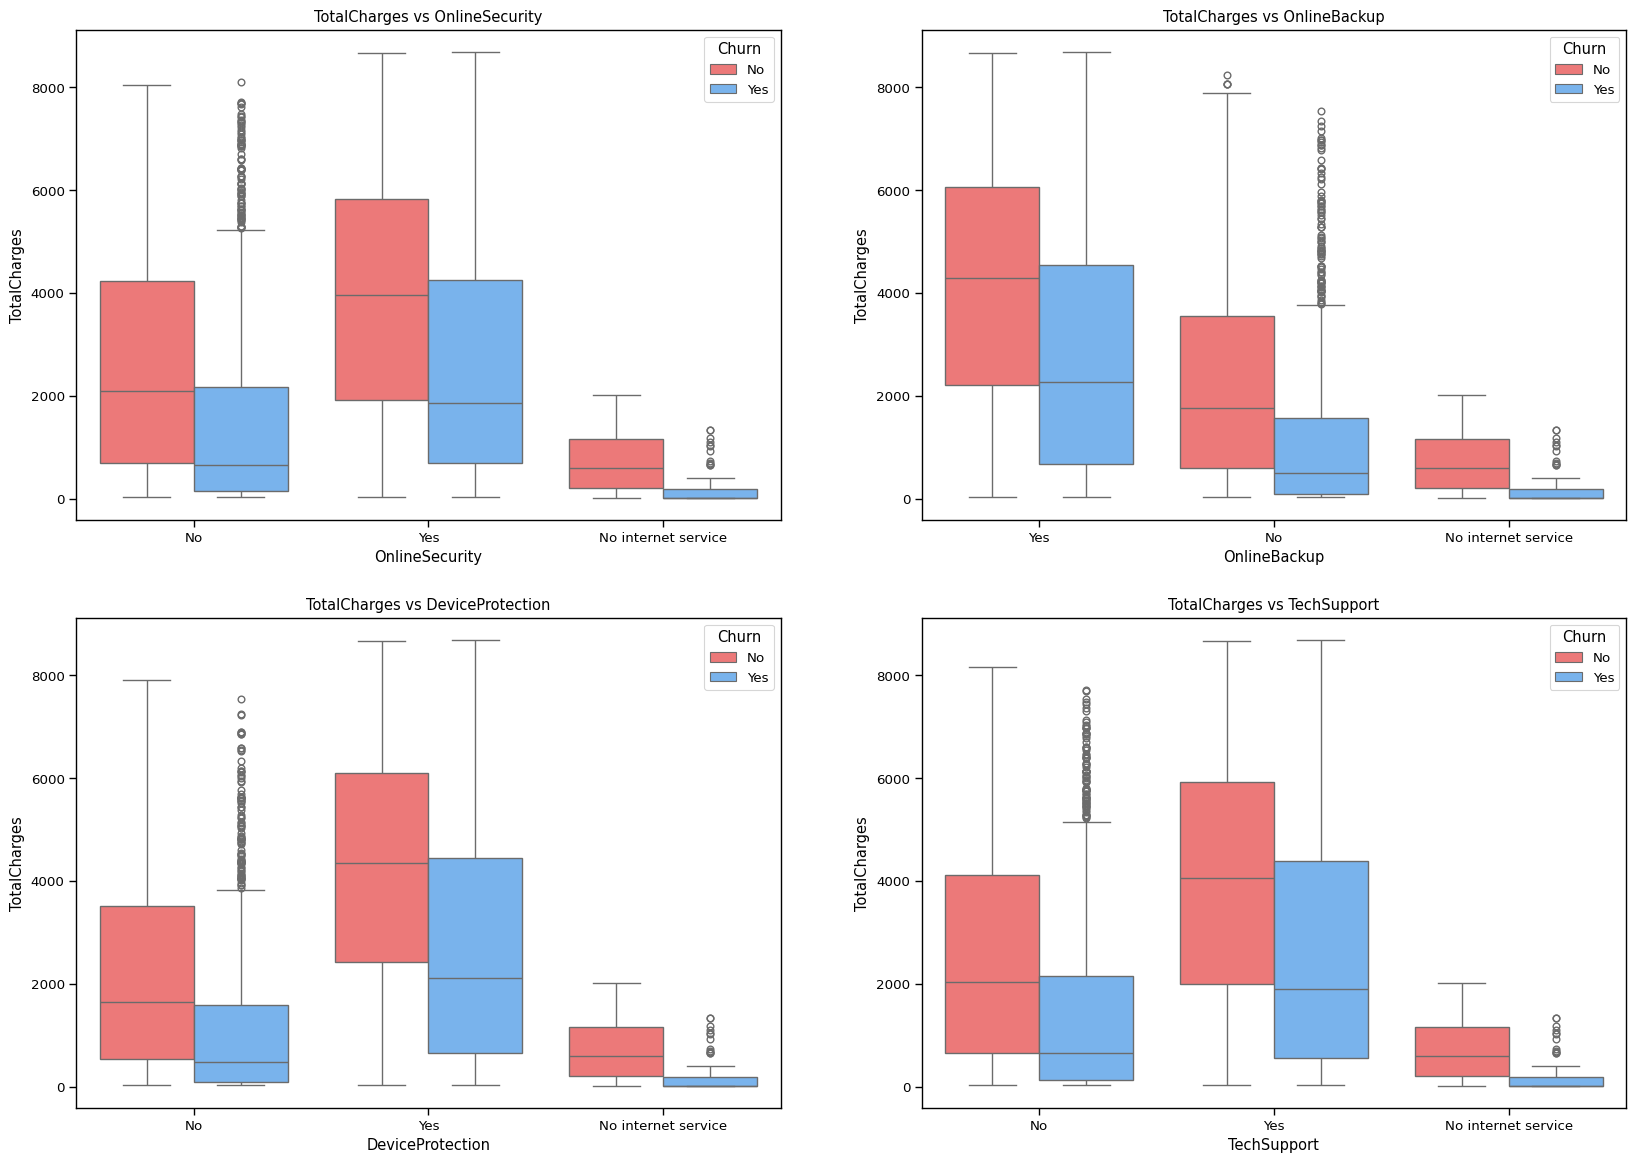

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'TotalCharges',data = df,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + l2[i-4]);
#For all the features mentioned above, customers become skeptical about paying for them around the 2000 mark. This median value of churn customers is very close to the lower limit of the customers that carry on with this service.
#Customers that do not churn out are ready to pay from 2000 - 6000 of TotalCharges.

In [ ]:
columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) > 6:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

categoric_columns = categoric_columns[:-1]

In [ ]:
numeric_columns

['MonthlyCharges', 'TotalCharges', 'customerID', 'tenure']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = df.copy()

df1[categoric_columns] = df1[categoric_columns].apply(le.fit_transform)
df1[['Churn']] = df1[['Churn']].apply(le.fit_transform)

In [ ]:
df1 = df1.drop(numeric_columns, axis=1)

In [ ]:
df1

,Contract,Dependents,DeviceProtection,InternetService,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,PaymentMethod,PhoneService,SeniorCitizen,StreamingMovies,StreamingTV,TechSupport,gender,Churn
0,0,0,0,0,1,2,0,1,1,2,0,0,0,0,0,0,0
1,1,0,2,0,0,0,2,0,0,3,1,0,0,0,0,1,0
2,0,0,0,0,0,2,2,1,0,3,1,0,0,0,0,1,1
3,1,0,2,0,1,0,2,0,0,0,0,0,0,0,2,1,0
4,0,0,0,1,0,0,0,1,0,2,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,2,0,2,0,2,1,1,3,1,0,2,2,2,1,0
7039,1,1,2,1,2,2,0,1,1,1,1,0,2,2,0,0,0
7040,0,1,0,0,1,0,2,1,1,2,0,0,0,0,0,0,0
7041,0,0,0,1,2,0,0,1,1,3,1,1,0,0,0,1,1


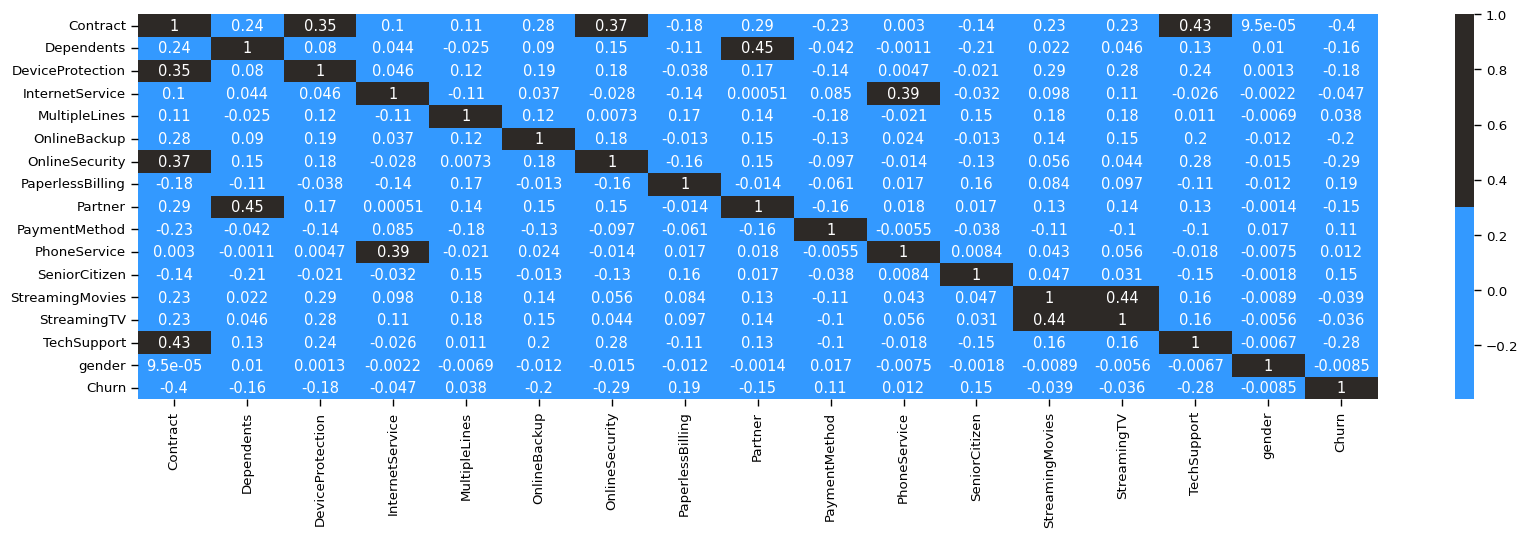

In [ ]:
colors = ['#3399ff','#2D2926']
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

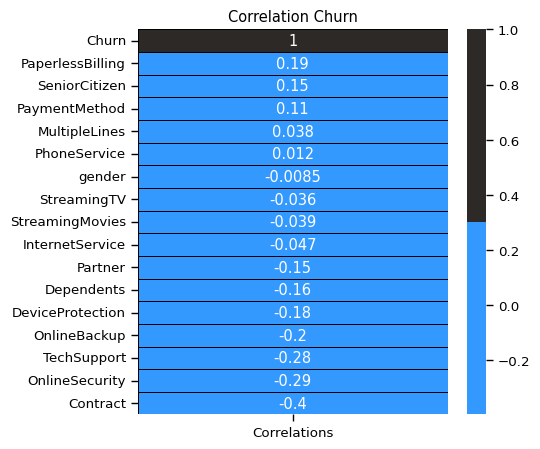

In [ ]:
corr = df1.corrwith(df1['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation Churn');

In [ ]:
df1.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df1.head()

,Contract,Dependents,DeviceProtection,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,PaymentMethod,SeniorCitizen,TechSupport,Churn
0,0,0,0,2,0,1,1,2,0,0,0
1,1,0,2,0,2,0,0,3,0,0,0
2,0,0,0,2,2,1,0,3,0,0,1
3,1,0,2,0,2,0,0,0,0,2,0
4,0,0,0,0,0,1,0,2,0,0,1


DATA MODELING

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
over = SMOTE(sampling_strategy = 1)

f1 = df1.iloc[:,:10].values
t1 = df1.iloc[:,10].values

f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({0: 5163, 1: 5163})

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.20, random_state = 2)

In [ ]:
def model(classifier,x_train,y_train,x_test,y_test):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    fpr, tpr, thresholds = roc_curve(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=None)
    roc_display.plot()
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

Cross Validation Score :  81.62%
ROC_AUC Score :  76.13%


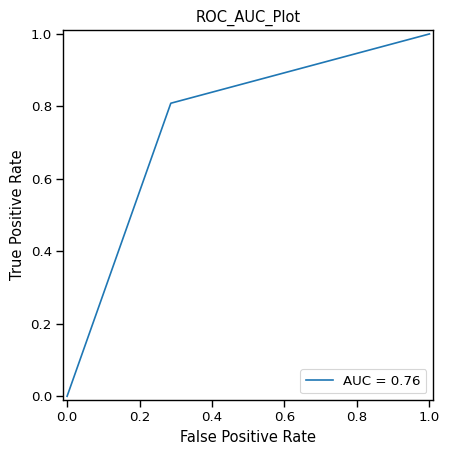

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      1062
           1       0.73      0.81      0.77      1004

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.76      2066



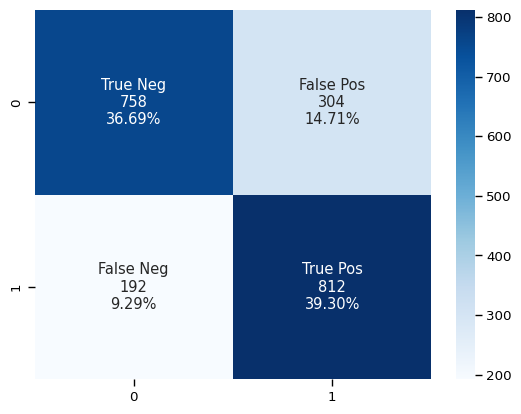

In [ ]:
# Decision Tree
tree_clf = DecisionTreeClassifier(
    criterion='gini', max_depth=4,
    min_samples_split=2, min_samples_leaf=1,
)
model(tree_clf,x_train,y_train,x_test,y_test)
model_evaluation(tree_clf,x_test,y_test)

Cross Validation Score :  82.74%
ROC_AUC Score :  76.50%


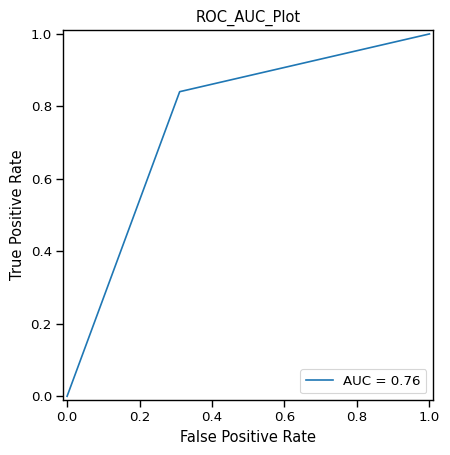

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      1062
           1       0.72      0.84      0.78      1004

    accuracy                           0.76      2066
   macro avg       0.77      0.76      0.76      2066
weighted avg       0.77      0.76      0.76      2066



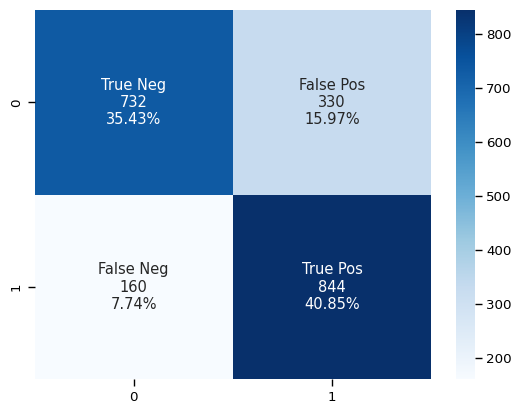

In [ ]:
# Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=200, criterion='gini',
    max_depth=4, min_samples_split=2,
    min_samples_leaf=1,
)
model(rf_clf,x_train,y_train,x_test,y_test)
model_evaluation(rf_clf,x_test,y_test)

Cross Validation Score :  82.72%
ROC_AUC Score :  76.25%


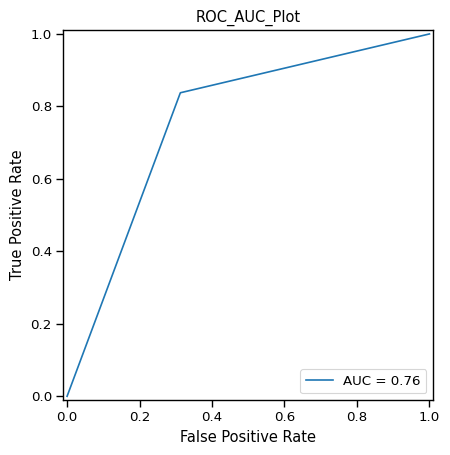

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      1062
           1       0.72      0.84      0.77      1004

    accuracy                           0.76      2066
   macro avg       0.77      0.76      0.76      2066
weighted avg       0.77      0.76      0.76      2066



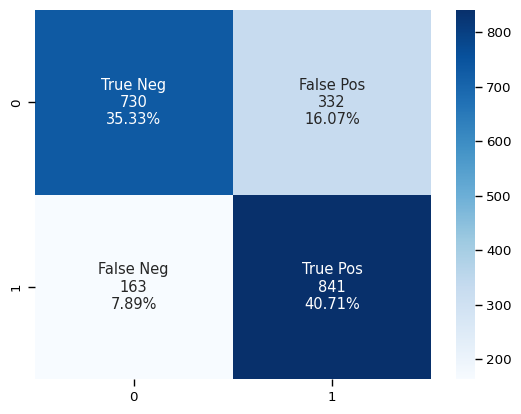

In [ ]:
# logistic regression
linear_clf = LogisticRegression()
model(rf_clf,x_train,y_train,x_test,y_test)
model_evaluation(rf_clf,x_test,y_test)

Cross Validation Score :  82.20%
ROC_AUC Score :  75.82%


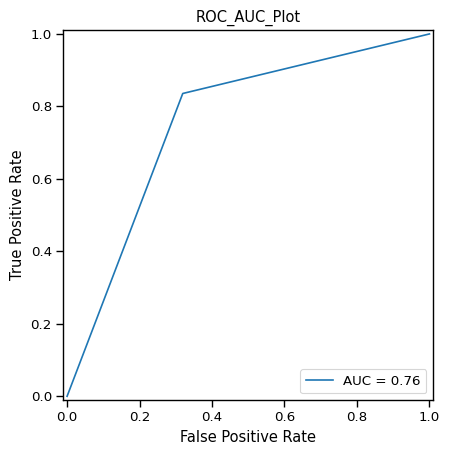

              precision    recall  f1-score   support

           0       0.81      0.68      0.74      1062
           1       0.71      0.84      0.77      1004

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.75      2066



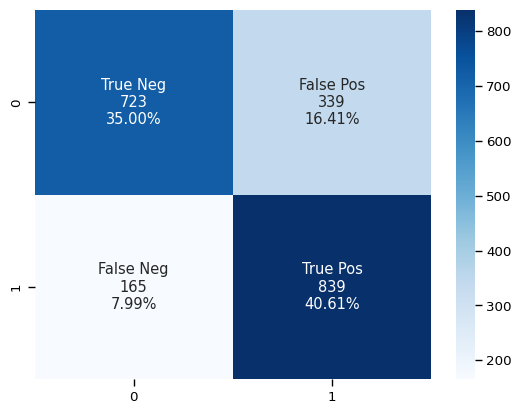

In [ ]:
# KNN
knn_clf = KNeighborsClassifier(n_neighbors = 11)
model(knn_clf,x_train,y_train,x_test,y_test)
model_evaluation(knn_clf,x_test,y_test)

Cross Validation Score :  81.74%
ROC_AUC Score :  77.22%


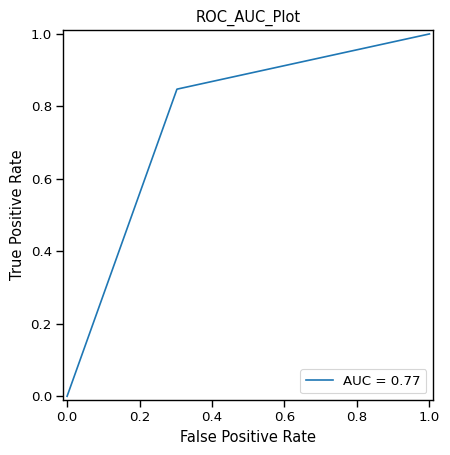

              precision    recall  f1-score   support

           0       0.83      0.70      0.76      1062
           1       0.73      0.85      0.78      1004

    accuracy                           0.77      2066
   macro avg       0.78      0.77      0.77      2066
weighted avg       0.78      0.77      0.77      2066



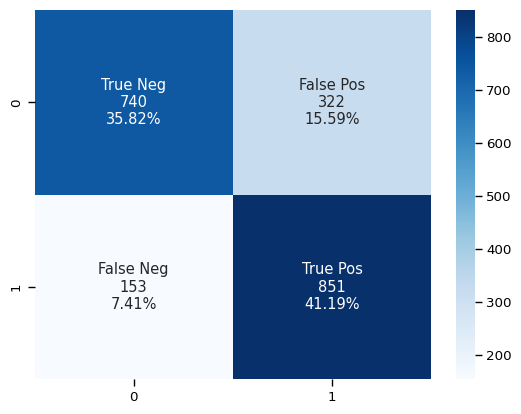

In [ ]:
# SVC
svc_clf = SVC()
model(svc_clf,x_train,y_train,x_test,y_test)
model_evaluation(svc_clf,x_test,y_test)